## Sales Analysis

### Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

### Load the data

In [2]:
import os

df_sales = pd.DataFrame()

for filename in os.listdir('./Sales_Data'):
    df = pd.read_csv('./Sales_data/'+filename)
    df_sales = pd.concat([df_sales, df], ignore_index=True)

df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
#Save combined data to csv
df_sales.to_csv('all_months_data.csv', index=False)

In [4]:
#Load combined df with combined files
df = pd.read_csv('all_months_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Cleaning

In [5]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [6]:
#Find out missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    print('{}-{}%'.format(col,round(pct_missing,2)))

Order ID-0.29%
Product-0.29%
Quantity Ordered-0.29%
Price Each-0.29%
Order Date-0.29%
Purchase Address-0.29%


In [7]:
#Remove missing values
new_df = df.dropna()

In [8]:
#Repeated header values
new_df[new_df['Quantity Ordered'] == 'Quantity Ordered']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
#Remove repeated header values
new_df = new_df[new_df['Quantity Ordered'] != 'Quantity Ordered']
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [10]:
#Convert data type
new_df['Quantity Ordered'] = new_df['Quantity Ordered'].astype('int64')
new_df['Price Each'] = new_df['Price Each'].astype('float64')
new_df['Order Date'] = pd.to_datetime(new_df['Order Date'])

new_df.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Analyze Data

#### 1. Months with the best sales

In [11]:
new_df['month'] = pd.DatetimeIndex(new_df['Order Date']).month
new_df['Total Sales'] = new_df['Quantity Ordered'] * new_df['Price Each']

In [12]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [13]:
month_sales = new_df.groupby('month').agg({'Total Sales':'sum', 'Quantity Ordered':'sum'})
month_sales.sort_values('Total Sales', ascending=False)

,Total Sales,Quantity Ordered
month,,
12,4.613443e+06,28114
10,3.736727e+06,22703
4,3.390670e+06,20558
11,3.199603e+06,19798
5,3.152607e+06,18667
3,2.807100e+06,17005
7,2.647776e+06,16072
6,2.577802e+06,15253
8,2.244468e+06,13448


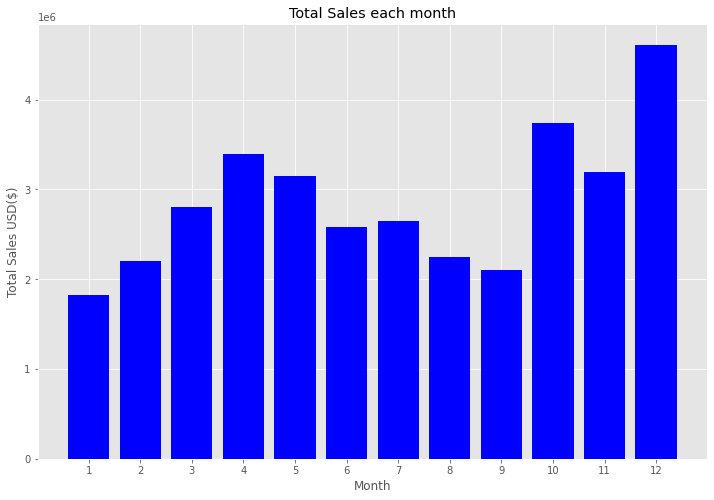

In [14]:
xpos= np.arange(1,13)

plt.bar(xpos,month_sales['Total Sales'], color='blue')
plt.xlabel('Month')
plt.ylabel('Total Sales USD($)')
plt.title('Total Sales each month')
plt.xticks(xpos)
plt.show()

- December had the best month for sales.Likely due to the holiday season where people are shopping for gifts during the holiday season.

#### 2. City with the highest number of sales

In [15]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [16]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

new_df['City'] = new_df['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [17]:
city_sales = new_df.groupby('City').agg({'Quantity Ordered':'sum','Total Sales':'sum'})
city_sales.sort_index(ascending=True, inplace=True)

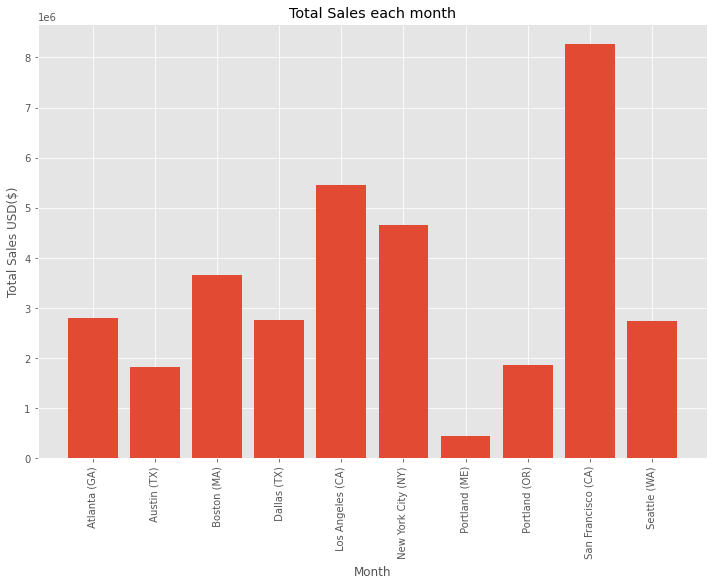

In [18]:
cities = new_df['City'].unique()
cities = np.sort(cities)

plt.bar(cities, city_sales['Total Sales'], label='Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales USD($)')
plt.title('Total Sales each month')
plt.xticks(cities, rotation='vertical')
plt.show()

San Francisco has the highest sale while Portland has the lowest sale.
- Look into the reasons resulting in different sales volume? Consider different population sizes, purchasing power, consumer preferences
- How to boost sales in Portland? Is there a need for more advertisments or loyalty programmes to attractive and retain consumers?

#### 3. When should companies display advertisments to maximize likelihood of customer's buying products?

In [19]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [20]:
new_df['Hour'] = pd.DatetimeIndex(new_df['Order Date']).hour
new_df['Minute'] = pd.DatetimeIndex(new_df['Order Date']).minute
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [21]:
#Find number of transactions by the hour
time_active = new_df.groupby('Hour').agg({'Quantity Ordered':'count'})
time_active

,Quantity Ordered
Hour,
0,3910
1,2350
2,1243
3,831
4,854
5,1321
6,2482
7,4011
8,6256


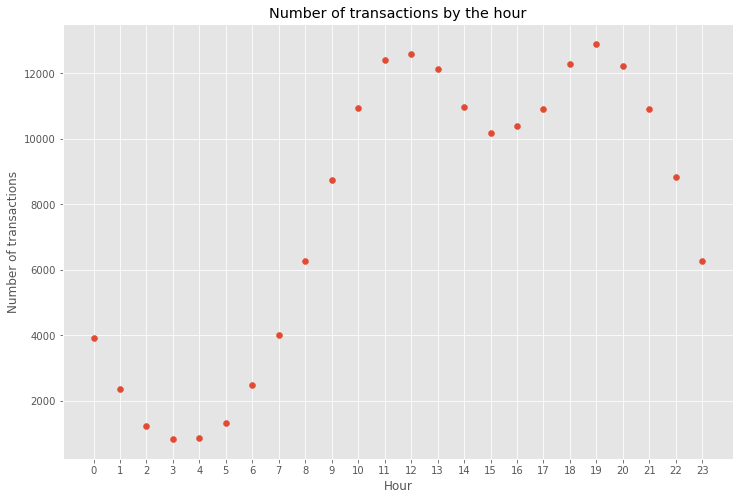

In [22]:
plt.scatter(np.arange(0,24), time_active['Quantity Ordered'])
plt.xlabel('Hour')
plt.ylabel('Number of transactions')
plt.title('Number of transactions by the hour')
plt.xticks(np.arange(0,24))
plt.show()

- Highest transactions during 11am to 1pm and 6pm to 8pm.
- Coincide with lunch break timing and after work hours where people are free to scroll social media, etc.
- Recommended to display advertisments at around 11am and 6pm.

#### 4. What products are most often sold together?

In [23]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [24]:
#Order Ids with more than one item
duplicated_id = new_df[new_df['Order ID'].duplicated(keep=False)]
duplicated_id['Grouped'] =  duplicated_id.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
duplicated_id = duplicated_id[['Order ID','Grouped']].drop_duplicates()
duplicated_id.head()

<ipython-input-24-f1fb536d5601>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicated_id['Grouped'] =  duplicated_id.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [25]:
#Reference: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in duplicated_id['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

- Accessory items like charging cables and headphones are usually purchased together with electronic products like handphones
- Consider providing special bundles or recommendations for these accessories whenever a customer is purchasing a phone

#### 5. Which product sold the most?

In [26]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [27]:
product_sales = new_df.groupby('Product').agg({'Quantity Ordered':'sum', 'Price Each':'mean'})
product_sales.sort_values('Quantity Ordered', ascending=False)

,Quantity Ordered,Price Each
Product,,
AAA Batteries (4-pack),31017,2.99
AA Batteries (4-pack),27635,3.84
USB-C Charging Cable,23975,11.95
Lightning Charging Cable,23217,14.95
Wired Headphones,20557,11.99
Apple Airpods Headphones,15661,150.00
Bose SoundSport Headphones,13457,99.99
27in FHD Monitor,7550,149.99
iPhone,6849,700.00


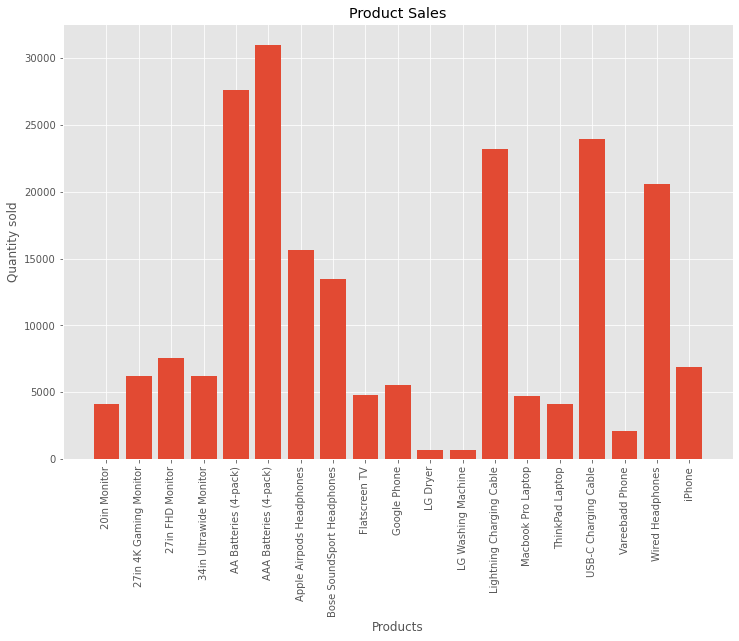

In [28]:
#Plot product sales
products = new_df['Product'].unique()
products = np.sort(products)

plt.bar(products, product_sales['Quantity Ordered'])
plt.xlabel('Products')
plt.ylabel('Quantity sold')
plt.title('Product Sales')
plt.xticks(products, rotation='vertical')

plt.show()

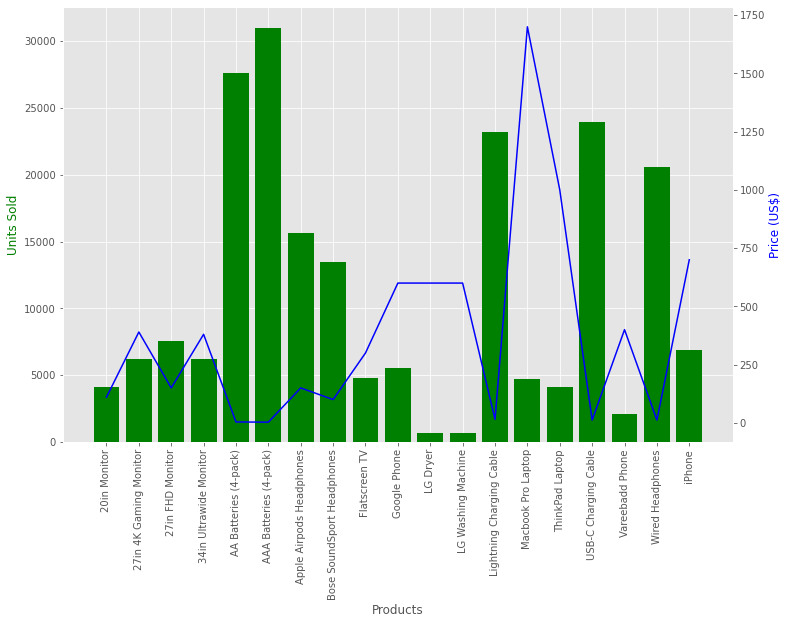

In [29]:
#Compare price and quantity sold
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, product_sales['Quantity Ordered'], color='green')
ax2.plot(products, product_sales['Price Each'], 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Units Sold', color='g')
ax2.set_ylabel('Price (US$)', color='b')
ax1.set_xticklabels(products, rotation='vertical')
plt.grid()

plt.show()

- AAA Batteries (4-pack) has the most units sold
- Items with lower price generally have higher sales quantity. These products are mainly accessory products with shorter lifespan (e.g. batteries)